<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(Inception)_Pepper_Plant_Village_DaThwsnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [6]:
# Define classes
classes = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]

In [7]:
# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Pepper"

In [8]:

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,  # Preprocess images according to InceptionV3 requirements
    validation_split=0.2  # Splitting the data into training and validation sets
)


In [9]:
# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Resizing images to 299x299 to match the input shape of InceptionV3
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

Found 1989 images belonging to 2 classes.


In [10]:
# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)


Found 496 images belonging to 2 classes.


In [11]:
# Load the InceptionV3 model without the top classification layer and with pretrained weights on ImageNet
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [12]:
# Freeze the layers in the Inception model
for layer in inception.layers:
    layer.trainable = False

In [13]:
# Define your custom classification layers without dropout
x = layers.GlobalAveragePooling2D()(inception.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

In [14]:
# Create the model
inception_model = models.Model(inception.input, output)

In [15]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
inception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fit the model
history = inception_model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

Epoch 1/30
63/63 [==============================] - 400s 6s/step - loss: 0.4009 - accuracy: 0.8245 - val_loss: 0.2206 - val_accuracy: 0.9173
Epoch 2/30
63/63 [==============================] - 394s 6s/step - loss: 0.1898 - accuracy: 0.9281 - val_loss: 0.1516 - val_accuracy: 0.9435
Epoch 3/30
63/63 [==============================] - 391s 6s/step - loss: 0.1309 - accuracy: 0.9593 - val_loss: 0.1335 - val_accuracy: 0.9516
Epoch 4/30
63/63 [==============================] - 395s 6s/step - loss: 0.1170 - accuracy: 0.9583 - val_loss: 0.1062 - val_accuracy: 0.9657
Epoch 5/30
63/63 [==============================] - 391s 6s/step - loss: 0.1016 - accuracy: 0.9628 - val_loss: 0.1180 - val_accuracy: 0.9516
Epoch 6/30
63/63 [==============================] - 391s 6s/step - loss: 0.1086 - accuracy: 0.9593 - val_loss: 0.1017 - val_accuracy: 0.9577
Epoch 7/30
63/63 [==============================] - 396s 6s/step - loss: 0.0880 - accuracy: 0.9643 - val_loss: 0.1599 - val_accuracy: 0.9375
Epoch 8/30
63

In [17]:
# Evaluate the model
test_loss, test_accuracy = inception_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 79s 5s/step - loss: 0.0762 - accuracy: 0.9657
Test Accuracy: 0.9657257795333862


In [18]:
# Get the predicted classes for the test data
y_pred = np.argmax(inception_model.predict(test_generator), axis=1)

16/16 [==============================] - 79s 5s/step


In [19]:
# Get true labels
y_true = test_generator.classes

In [20]:
#Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

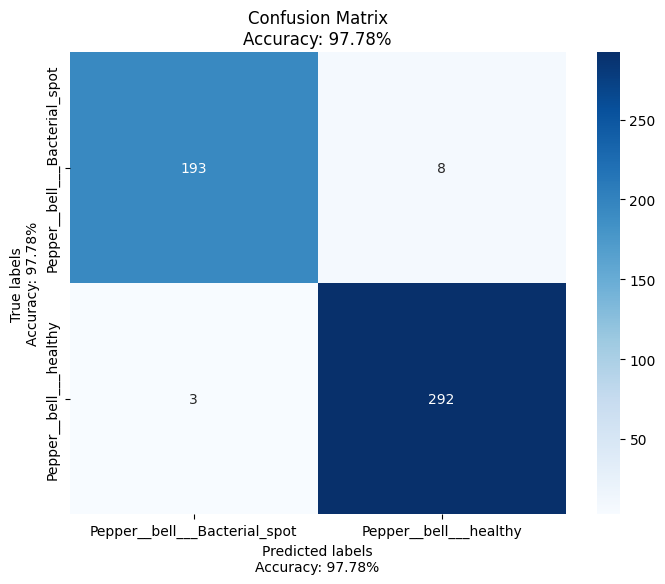

In [21]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

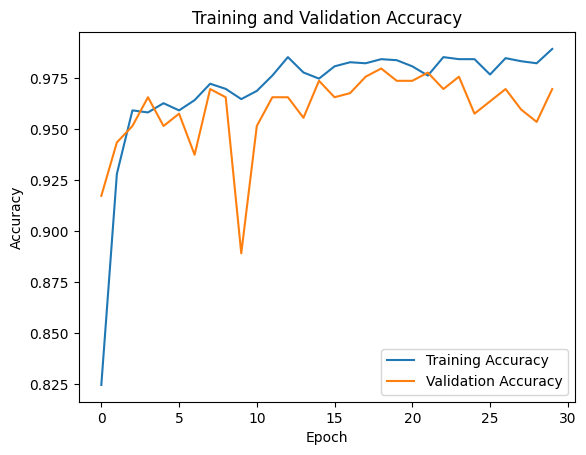

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


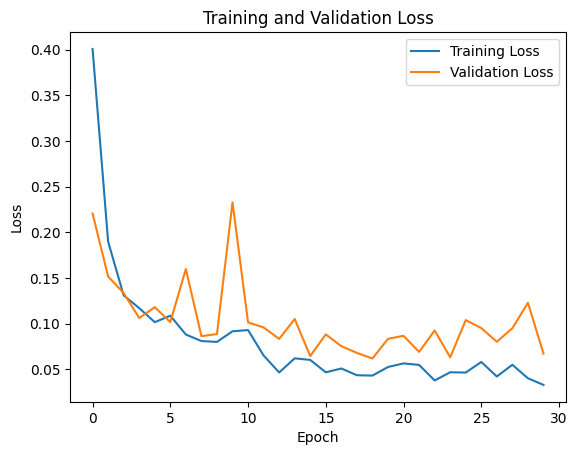

In [23]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [24]:
# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)


Predicted class name: Pepper__bell___Bacterial_spot


Whole Code in One GO {Ease in Getting the whole code on other Plateforms(Just Copy from here)}

Found 1989 images belonging to 2 classes.
Found 496 images belonging to 2 classes.
Epoch 1/20
63/63 [==============================] - 399s 6s/step - loss: 0.3748 - accuracy: 0.8396 - val_loss: 0.1985 - val_accuracy: 0.9234
Epoch 2/20
63/63 [==============================] - 395s 6s/step - loss: 0.1744 - accuracy: 0.9356 - val_loss: 0.1801 - val_accuracy: 0.9173
Epoch 3/20
63/63 [==============================] - 393s 6s/step - loss: 0.1403 - accuracy: 0.9467 - val_loss: 0.1557 - val_accuracy: 0.9415
Epoch 4/20
63/63 [==============================] - 397s 6s/step - loss: 0.1098 - accuracy: 0.9583 - val_loss: 0.1271 - val_accuracy: 0.9556
Epoch 5/20
63/63 [==============================] - 396s 6s/step - loss: 0.1262 - accuracy: 0.9502 - val_loss: 0.1596 - val_accuracy: 0.9395
Epoch 6/20
63/63 [==============================] - 395s 6s/step - loss: 0.0903 - accuracy: 0.9688 - val_loss: 0.1090 - val_accuracy: 0.9516
Epoch 7/20
63/63 [==============================] - 398s 6s/step - loss

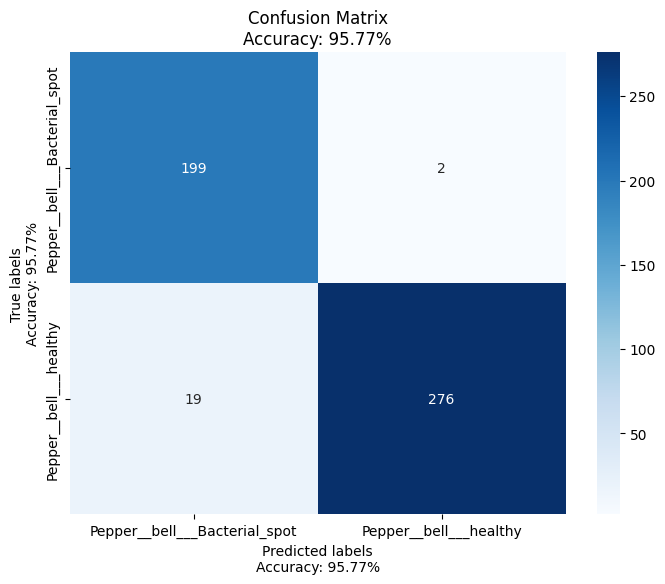

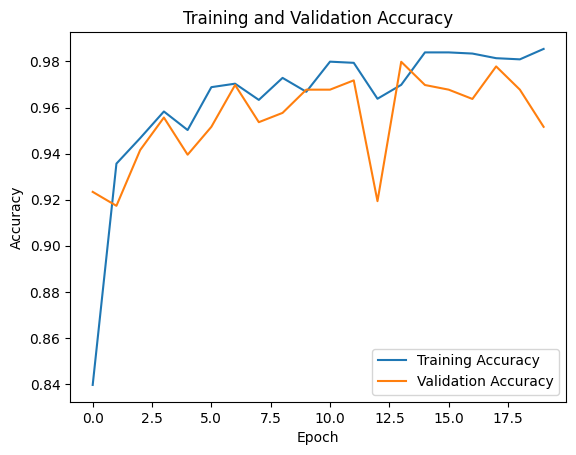

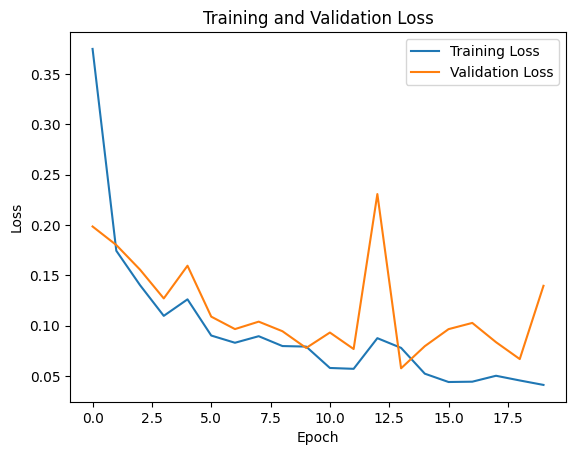

Predicted class name: Pepper__bell___Bacterial_spot


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Define classes
classes = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]

# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Pepper"

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,  # Preprocess images according to InceptionV3 requirements
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Resizing images to 299x299 to match the input shape of InceptionV3
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the InceptionV3 model without the top classification layer and with pretrained weights on ImageNet
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the Inception model
for layer in inception.layers:
    layer.trainable = False

# Define your custom classification layers without dropout
x = layers.GlobalAveragePooling2D()(inception.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

# Create the model
inception_model = models.Model(inception.input, output)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
inception_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = inception_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = inception_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(inception_model.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
